
# SULHAIRAH - 2009106026
# POSTTEST 8

# IMPORT

In [3]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,optimizers,datasets
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds

In [4]:
pip install tensorflow_datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
ds = tfds.load('mnist', split='train', shuffle_files=True)

Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to ~/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [35]:
ds = ds.shuffle(1024).batch(32).prefetch(tf.data.AUTOTUNE)
for example in ds.take(1):
  image, label = example["image"], example["label"]


# LOAD DATASET

In [37]:
ds = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = ds.load_data()

11490434/11490434 [==============================] - 0s 0us/step


# ENCODING LABEL

In [38]:
num_class = 10
y_train = keras.utils.to_categorical(y_train, num_class)
y_test = keras.utils.to_categorical(y_test, num_class)

print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


# TAMPILKAN DATASET

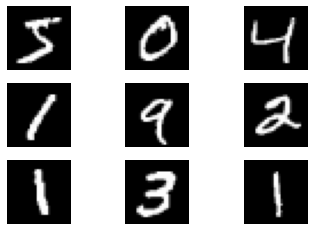

In [39]:
plt.figure
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[i],cmap='gray')
  plt.axis('off')

plt.show()

# RESHAPE GAMBAR

In [40]:
x_train = X_train.reshape(60000,784)
x_test = X_test.reshape(10000,784)

# NORMALISASI

In [41]:
#Normalize image pixel values.
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

# BUAT MODEL

In [42]:
model_data = keras.Sequential()

In [43]:
#Input Layer
model_data.add(layers.Dense(512,activation='relu',input_dim=784))

#Hidden Layer
model_data.add(layers.Dense(256,activation='relu'))
model_data.add(layers.Dense(128,activation='relu'))

#Output Layer
model_data.add(layers.Dense(10,activation='softmax'))

In [44]:
model_data.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


# COMPILE MODEL

In [45]:
Optimizer = optimizers.Adam(learning_rate=0.0001)

model_data.compile(loss=keras.losses.categorical_crossentropy,optimizer=Optimizer,
                    metrics=['accuracy'])

# TRAINING MODEL

In [46]:
history = model_data.fit(x_train,y_train,epochs=20,batch_size=128,verbose=1,validation_data=(x_test,y_test))

Epoch 1/20
469/469 [==============================] - 7s 13ms/step - loss: 0.5381 - accuracy: 0.8630 - val_loss: 0.2306 - val_accuracy: 0.9354
Epoch 2/20
469/469 [==============================] - 6s 12ms/step - loss: 0.2010 - accuracy: 0.9430 - val_loss: 0.1637 - val_accuracy: 0.9499
Epoch 3/20
469/469 [==============================] - 6s 12ms/step - loss: 0.1485 - accuracy: 0.9580 - val_loss: 0.1350 - val_accuracy: 0.9598
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1179 - accuracy: 0.9658 - val_loss: 0.1211 - val_accuracy: 0.9633
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0962 - accuracy: 0.9722 - val_loss: 0.0993 - val_accuracy: 0.9685
Epoch 6/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0798 - accuracy: 0.9768 - val_loss: 0.0969 - val_accuracy: 0.9696
Epoch 7/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0670 - accuracy: 0.9810 - val_loss: 0.0844 - val_accuracy: 0.9746

# EVALUATE MODEL

In [47]:
score = model_data.evaluate(x_test,y_test,verbose=1)
print(f'Test Loss    : {score[0]}')
print(f'Test Akurasi : {round(score[1] * 100,2)} %')

313/313 [==============================] - 1s 4ms/step - loss: 0.0757 - accuracy: 0.9774
Test Loss    : 0.07566183805465698
Test Akurasi : 97.74 %


# PREDIKSI MODEL

In [48]:
predictions = model_data.predict(x_test)

313/313 [==============================] - 1s 3ms/step


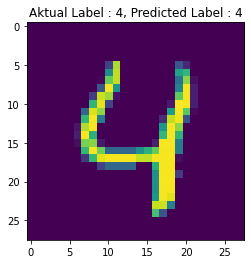

In [49]:
label = np.argmax(predictions,axis=1)
ActualLabel = np.argmax(y_test[4])



img = x_test[4].reshape(28, 28)

plt.title(f"Aktual Label : {ActualLabel}, Predicted Label : {label[4]}")

plt.imshow(img)
plt.show()

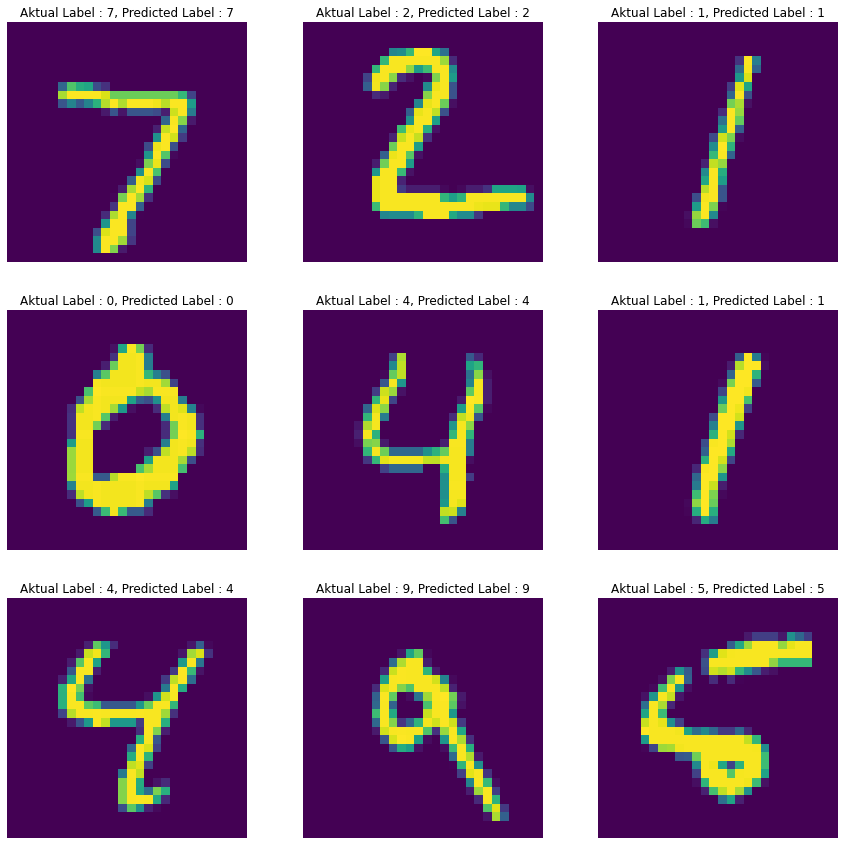

In [50]:
plt.figure(figsize=(15,15))
for i in range(9):
  plt.subplot(3,3,i+1)


  ActualLabel = np.argmax(y_test[i])
  plt.title(f"Aktual Label : {ActualLabel}, Predicted Label : {label[i]}")
  plt.imshow(x_test[i].reshape(28, 28))
  plt.axis('off')

plt.show()